## E-07 : 네이버 영화리뷰 감성분석 도전하기

### 여기서 잠시 임베딩 레이어에 대해 기초 다지기  

###### 1) 임베딩이란?  
NLP 자연어처리 분야에서  
사람이 쓰는 자연어를 기계가 이해할 수 있는  
숫자형태인 vector로 바꾼 결과 혹은 그 일련의 과정 전체를 의미   

##### 2) 원-핫 인코딩 vs 임베딩 벡터 (워드 임베딩)
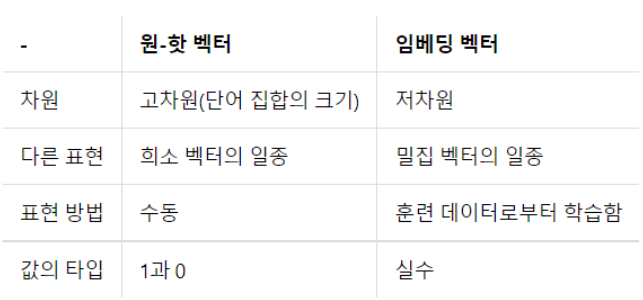

원-핫 인코딩 : 원-핫 벡터를 만드는 과정   
워드 임베딩 (임베딩벡터) : 텍스트 내 단어들 밀집 벡터 (desnse vector)로 만드는 것  

-----

##### 1) Embedding()
* 역할  
단어를 밀집 벡터 (dense vector)로 만듦 = 임베딩 레이어를 만듦  
정수 인코딩이 된 단어들을 입력받아서 임베딩 수행  
output으로 결국 lookup table에 나오는 밀집 벡터가 반환됨  
<br>

* 인풋
(문자들 정수 시퀀스, 인풋 길이)  
=(number of samples, input_length)인 2D 정수 텐서를 입력 받음  

  문자들의 정수 시퀀스<br> 
    = 문자들이 정수 인코딩 된 결과<br> 
    = 임의로 부여된 단어의 순서에 대한 숫자 부여한 결과물<br>
  <br>
  인풋 길이 <br> 
    = 여기서는 10개 <br> 
    = 딕셔너리에 있는 단어들의 총 개수 <br> 
<br>
* 실제 코드 작성 = 아웃풋   
```
# Embedding(number of samples, input_length)   
# Embedding(총 단어 개수, 임베딩 벡터 출력 차원 크기, 입력 시퀀스의 길이)   
Embedding(vocab_size, embedding_dim, input_length=5) 예시
```
##### 2) Sequential() <br>   
* 역할  
인공 신경망의 입력층, 은닉층(히든 레이어), 출력층을 구성해줌  


* 실제 코드 작성  
```
#라이브러리, 모델 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```
```
#Sequential()을 모델로 쓰겠다고 선언
model = Sequential()
```
```
#레이어 추가
model.add(레이어 명) 
```
```
#임베딩 레이어도 하나의 인공신경망(NN)의 레이어 중 하나라서 추가
model.add(Embedding(vocabulary, output_dim, input_length))
```

##### 3) Dense()  

* 역할  
FC= fully-conntected layer= 전결합층 추가해줌  


* 실제 코드 작성
```
#Dense(출력 뉴런 수, 입력 뉴런 수 =입력차원, 활성화 함수)
#마지막으로 쓰이지 않은 층 -> 은닉층이 됨
model.add(Dense(8, input_dim=4, activation='relu'))
```
```
#이전 층 출력 뉴런 수가 8개 = 해당 층의 입력 뉴런 수 -> 생략됨
#마지막으로 추가되는 층 -> 출력층이 됨
model.add(Dense(1, activation='sigmoid')) 
```
위에 코드들 시각화
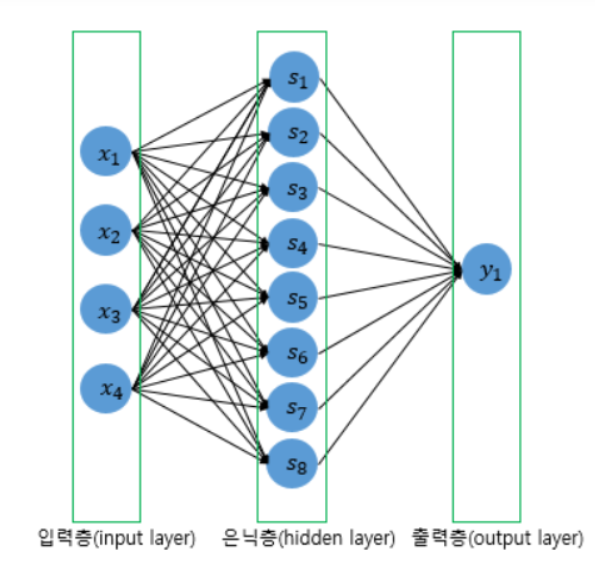


* 다양한 활성화 함수 = activation function  
    - linear   
    : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
    - sigmoid   
    : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
    - softmax   
    : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
    - relu   
    : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수. 
    

### 1. 데이터 가져오기
#### 1) 심볼릭 링크로 데이터 가져오기

In [ ]:
! ln -s ~/data/*.txt ~/aiffel/sentiment_classification/data

#### 2) 데이터 준비 및 확인

In [208]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

In [2]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 2. 데이터로더 구성
* IMDB 데이터셋  
   imdb.data_loader() 메소드를 호출  
   -> 숫자 인덱스로 변환된 텍스트 + word_to_index 딕셔너리 제공


* nsmc 데이터셋  
   전혀 가공되어 있지 않은 텍스트 파일  
   자신만의 data_loader 만들어보기 = imdb.data_loader()와 동일하게 동작하는  


* data_loader에 있어야할 기능들  
  - 데이터의 중복 제거
  - NaN 결측치 제거
  - 한국어 토크나이저로 토큰화
  - 불용어(Stopwords) 제거
  - 사전word_to_index 구성
  - 텍스트 스트링을 사전 인덱스 스트링으로 변환
  - X_train, y_train, X_test, y_test, word_to_index 리턴

In [209]:
from konlpy.tag import Mecab
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
#1. 데이터 중복제거
    #drop_duplicates() : 중복 요소 삭제
    #subset : document 컬럼 값에 한해서  
    #inplace=True : DataFrame 자체에 dropna
    #inplace=False : DataFrame 원본 두고, 새롭게 적용해서 return
    train_data.drop_duplicates(subset=['document'], inplace=True)
    
#2. NAN 결측치 제거
    #how=any :행 or열에 결측치 NaN 2개만 있어도 drop
    #how=all : 행 or열에 있는 모든 값이 NaN이면 drop
    train_data = train_data.dropna(how = 'any') 
    
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
#3. 토큰화
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
#4. 불용어 제거 : stopword에 해당 토큰 없다면 
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        #X_train에 토큰 추가
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    #단어사전 구성
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
#5. 사전word_to_index 구성
    word_to_index = {word:index for index, word in enumerate(vocab)}
    
#6. 텍스트 스트링을 사전 인덱스 스트링으로 변환
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

#7. X_train, y_train, X_test, y_test, word_to_index  리턴
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

In [210]:
#8. index to word 구성
index_to_word = {index:word for word, index in word_to_index.items()}

In [211]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

### 3. 데이터 분석 및 가공 (모델 구성위한)
#### 1) 데이터셋 내 문장 길이 분포  

In [212]:
#훈련, 테스트의 문장들 리스트들을 하나에 합침
total_data_text = list(X_train) + list(X_test)

# 전체 문장 리스트에서 tokens 이름으로 리스트를 하나씩 가져와서
#텍스트데이터 문장길이의 리스트 = num_tokens를 생성
num_tokens = [len(tokens) for tokens in total_data_text]
#리스트를 배열로 바꿈
num_tokens = np.array(num_tokens)

#출력시 최대 문장길이 값을 어떤 기준으로 설정하지?
# 문장길이의 평균값, 최대값, 표준편차 계산
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092


#### 2)  적절한 최대 문장 길이 지정  

In [213]:
# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)

#최종적으로 우리가 정한 maxlen = 41 = 최대 문장길이
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))


pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


#### 3)  keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가  

In [214]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index['<PAD>'],
                                                        padding='pre',
                                                        maxlen=maxlen)

X_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index['<PAD>'],
                                                       padding='pre',
                                                       maxlen=maxlen)

print(X_train.shape)
print(X_test.shape)

(146182, 41)
(49157, 41)


### 4. validation set 구성

In [215]:
# validation set 20000건 분리
X_val = X_train[:20000]   
y_val = y_train[:20000]

# validation set을 제외한 나머지 126182건
partial_X_train = X_train[20000:]  
partial_y_train = y_train[20000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(126182, 41)
(126182,)


### 5. 모델 구성 및 학습
RNN
1-D CNN
LSTM
GlobalMaxPooling

#### 1. LSTM

In [221]:
vocab_size = 10000  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 30  # 단어 하나를 표현하는 임베딩 벡터의 차원수 = lookup table 열의 수

#keras의 순차모델을 가져와서 쓰겠다
model_l = keras.Sequential()

#임베딩 레이어 설정
model_l.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))

# LSTM = 장단기 메모리 = Long Short-Term Memory  
model_l.add(keras.layers.LSTM(64))   
model_l.add(keras.layers.Dense(8, activation='relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model_l.add(keras.layers.Dense(1, activation='sigmoid'))  

#모델 정보 요약해서 확인
model_l.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_56 (Embedding)     (None, None, 30)          300000    
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                24320     
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 9         
Total params: 324,849
Trainable params: 324,849
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_l.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs= 7  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 


# history =  매 epoch마다의 train/validation loss, accuracy 등이 저장
#추후 데이터를 그래프로 그리면, 오버피팅/언더피팅 등 성능 개선 아이디어 얻을 수 있음
history_l = model_l.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/7
247/247 [==============================] - 7s 17ms/step - loss: 0.5452 - accuracy: 0.7232 - val_loss: 0.3489 - val_accuracy: 0.8482
Epoch 2/7
247/247 [==============================] - 4s 15ms/step - loss: 0.3307 - accuracy: 0.8583 - val_loss: 0.3372 - val_accuracy: 0.8534
Epoch 3/7
247/247 [==============================] - 4s 15ms/step - loss: 0.2992 - accuracy: 0.8733 - val_loss: 0.3443 - val_accuracy: 0.8508
Epoch 4/7
247/247 [==============================] - 4s 15ms/step - loss: 0.2818 - accuracy: 0.8815 - val_loss: 0.3459 - val_accuracy: 0.8546
Epoch 5/7
247/247 [==============================] - 4s 15ms/step - loss: 0.2554 - accuracy: 0.8911 - val_loss: 0.3474 - val_accuracy: 0.8560
Epoch 6/7
247/247 [==============================] - 4s 15ms/step - loss: 0.2382 - accuracy: 0.9001 - val_loss: 0.3521 - val_accuracy: 0.8555
Epoch 7/7
247/247 [==============================] - 4s 15ms/step - loss: 0.2226 - accuracy: 0.9062 - val_loss: 0.3849 - val_accuracy: 0.8528


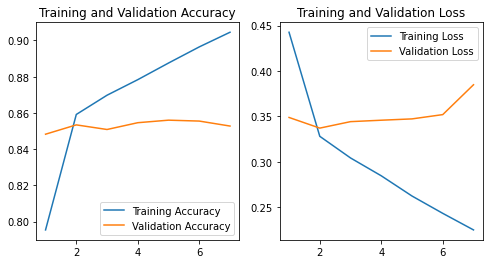

In [13]:
history_dict = history_l.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy 그래프
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 2. 1-D CNN

In [35]:
vocab_size = 10000  # 어휘 사전의 크기
word_vector_dim = 30   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model_c = keras.Sequential()
model_c.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_c.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_c.add(keras.layers.MaxPooling1D(5))
model_c.add(keras.layers.Conv1D(16, 7, activation='relu'))
#GlobalMaxPooling1D() 레이어 : 전체 문장중, 단 하나의 단어만 피처로 추출  
#추출된 피처로 문장의 긍정/부정 평가 -> 의외로 성능 좋음
model_c.add(keras.layers.GlobalMaxPooling1D())
model_c.add(keras.layers.Dense(8, activation='relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model_c.add(keras.layers.Dense(1, activation='sigmoid')) 

model_c.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 30)          300000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          3376      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [36]:
model_c.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs= 7  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 


# history =  매 epoch마다의 train/validation loss, accuracy 등이 저장
#추후 데이터를 그래프로 그리면, 오버피팅/언더피팅 등 성능 개선 아이디어 얻을 수 있음
history_c = model_c.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/7
247/247 [==============================] - 10s 25ms/step - loss: 0.5856 - accuracy: 0.6868 - val_loss: 0.3534 - val_accuracy: 0.8461
Epoch 2/7
247/247 [==============================] - 2s 9ms/step - loss: 0.3245 - accuracy: 0.8626 - val_loss: 0.3368 - val_accuracy: 0.8530
Epoch 3/7
247/247 [==============================] - 2s 9ms/step - loss: 0.2767 - accuracy: 0.8882 - val_loss: 0.3361 - val_accuracy: 0.8571
Epoch 4/7
247/247 [==============================] - 2s 8ms/step - loss: 0.2392 - accuracy: 0.9064 - val_loss: 0.3404 - val_accuracy: 0.8579
Epoch 5/7
247/247 [==============================] - 2s 9ms/step - loss: 0.1982 - accuracy: 0.9254 - val_loss: 0.3668 - val_accuracy: 0.8547
Epoch 6/7
247/247 [==============================] - 2s 9ms/step - loss: 0.1578 - accuracy: 0.9453 - val_loss: 0.4042 - val_accuracy: 0.8467
Epoch 7/7
247/247 [==============================] - 2s 9ms/step - loss: 0.1198 - accuracy: 0.9611 - val_loss: 0.4507 - val_accuracy: 0.8422


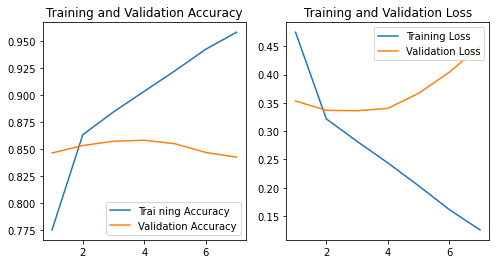

In [38]:
history_dict = history_c.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy 그래프
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Trai ning Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 3. LSTM + Dropout

In [54]:
vocab_size = 10000  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 30

model_d = keras.Sequential()
model_d.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))

model_d.add(keras.layers.LSTM(64))
model_d.add(keras.layers.Dropout(0.5))                    # Dropout 추가
model_d.add(keras.layers.Dense(8, activation='relu'))
model_d.add(keras.layers.Dropout(0.5))                     # Dropout 추가
model_d.add(keras.layers.Dense(1, activation='sigmoid'))  
# 최종 출력은 긍정/부정을 나타내는 1dim
            
model_d.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 30)          300000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 324,849
Trainable params: 324,849
Non-trainable params: 0
________________________________________________

In [55]:
model_d.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs= 10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 


# history =  매 epoch마다의 train/validation loss, accuracy 등이 저장
#추후 데이터를 그래프로 그리면, 오버피팅/언더피팅 등 성능 개선 아이디어 얻을 수 있음
history_d = model_d.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose = 1)

Epoch 1/10
247/247 [==============================] - 6s 16ms/step - loss: 0.6189 - accuracy: 0.6522 - val_loss: 0.3910 - val_accuracy: 0.8457
Epoch 2/10
247/247 [==============================] - 4s 15ms/step - loss: 0.4259 - accuracy: 0.8494 - val_loss: 0.3698 - val_accuracy: 0.8487
Epoch 3/10
247/247 [==============================] - 4s 15ms/step - loss: 0.3888 - accuracy: 0.8628 - val_loss: 0.3602 - val_accuracy: 0.8522
Epoch 4/10
247/247 [==============================] - 4s 15ms/step - loss: 0.3668 - accuracy: 0.8702 - val_loss: 0.3530 - val_accuracy: 0.8531
Epoch 5/10
247/247 [==============================] - 4s 15ms/step - loss: 0.3442 - accuracy: 0.8781 - val_loss: 0.3529 - val_accuracy: 0.8546
Epoch 6/10
247/247 [==============================] - 4s 15ms/step - loss: 0.3237 - accuracy: 0.8836 - val_loss: 0.3528 - val_accuracy: 0.8556
Epoch 7/10
247/247 [==============================] - 4s 15ms/step - loss: 0.3078 - accuracy: 0.8897 - val_loss: 0.3659 - val_accuracy: 0.8518

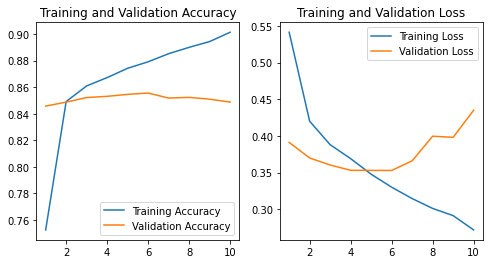

In [57]:
history_dict = history_d.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy 그래프
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 4. CNN+RNN = RCNN
추후 더 공부해보고 하기  
https://ballentain.tistory.com/31  
https://soyoung-new-challenge.tistory.com/7  

In [39]:
def RCNN_Block(name, input_tensor, n_filters, kernel_size = (3, 3), strides = (1, 1), padding = "same",
               dropout_ratio = 0.1, training = False, initializer = tf.contrib.layers.xavier_initializer(),
               hidden_layer = True):
 
    if hidden_layer:           
        input_tensor = tf.layers.max_pooling2d(inputs = input_tensor,
                                               pool_size = (2,2), strides = (2,2), padding = padding)
    # channel 수 맞추기 위한 과정
    input_tensor = tf.layers.conv2d(input_tensor, n_filters, kernel_size, strides, padding, 
                                    kernel_initializer = initializer)
    input_tensor_bn = tf.layers.batch_normalization(input_tensor, training = training)
    input_tensor_relu = tf.nn.relu(input_tensor_bn)
    input_tensor_drop = tf.layers.dropout(input_tensor_relu, rate = dropout_ratio, training = training)
 
    # recurrent cnn  
   # rcnn layer1
    conv1 = tf.layers.conv2d(input_tensor_drop, n_filters, kernel_size, strides, padding, 
                             kernel_initializer = initializer, name = name)
    add1 = input_tensor + conv1
    bn1 = tf.layers.batch_normalization(add1, training = training)
    relu1 = tf.nn.relu(bn1)
    drop1 = tf.layers.dropout(relu1, rate = dropout_ratio, training = training)
 
   # rcnn layer2
    conv2 = tf.layers.conv2d(drop1, n_filters, kernel_size, strides, padding, 
                             kernel_initializer = initializer, name = name, reuse = tf.AUTO_REUSE)
    add2 = input_tensor + conv2
    bn2 = tf.layers.batch_normalization(add2, training = training)
    relu2 = tf.nn.relu(bn2)
    drop2 = tf.layers.dropout(relu2, rate = dropout_ratio, training = training)
    
   # rcnn layer3
    conv3 = tf.layers.conv2d(drop2, n_filters, kernel_size, strides, padding, 
                             kernel_initializer = initializer, name = name, reuse = tf.AUTO_REUSE)
    add3 = input_tensor + conv3
    bn3 = tf.layers.batch_normalization(add3, training = training)
    relu3 = tf.nn.relu(bn3)
    drop3 = tf.layers.dropout(relu3, rate = dropout_ratio, training = training)
 
   # rcnn layer4 
    conv4 = tf.layers.conv2d(drop3, n_filters, kernel_size, strides, padding, 
                             kernel_initializer = initializer, name = name, reuse = tf.AUTO_REUSE)
    add4 = input_tensor + conv4
    bn4 = tf.layers.batch_normalization(add4, training = training) 
    relu4= tf.nn.relu(bn4 )
    output = tf.layers.dropout(relu4, rate = dropout_ratio, training = training)
    
    return output

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [ ]:
vocab_size = 10000  # 어휘 사전의 크기
word_vector_dim = 30   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model_c = keras.Sequential()
model_c.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_c.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_c.add(keras.layers.MaxPooling1D(5))
model_c.add(keras.layers.Conv1D(16, 7, activation='relu'))
#GlobalMaxPooling1D() 레이어 : 전체 문장중, 단 하나의 단어만 피처로 추출  
#추출된 피처로 문장의 긍정/부정 평가 -> 의외로 성능 좋음
model_c.add(keras.layers.GlobalMaxPooling1D())
model_c.add(keras.layers.Dense(8, activation='relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model_c.add(keras.layers.Dense(1, activation='sigmoid')) 

model_c.summary()

##### 4. 각 모델 학습 결과 정리
| 모델 | val_accuracy | val_loss|  
|------|------|------|
|LSTM|0.8549|0.4131|  
|1-D CNN|0.8282|0.6965|  
|LSTM-Dropout|0.8488|0.4349|


-----
#### 6. 학습된 임베딩 레이어 분석_ Word2Vec

In [222]:
import os
import gensim
from gensim.models.keyedvectors import Word2VecKeyedVectors
from tensorflow.keras.initializers import Constant

In [223]:
# 임베딩 레이어 차원 확인해보기
embedding_layer = model_l.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 30)


In [224]:
import os

# 학습한 Embedding 파라미터를 파일에 써서 저장
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')

# 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 기록
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록
vectors = model_l.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [225]:
#gensim에서 제공하는 패키지 : 위에 남긴 임베딩 파라미터 읽어서
# -> word vector로 활용 가능
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)

In [226]:
#유사 단어 확인 = 성능확인
word_vectors.similar_by_word("사랑")

[('찾', 0.6174713969230652),
 ('말리', 0.6052799224853516),
 ('삭', 0.5788902044296265),
 ('이끌', 0.571204662322998),
 ('주기', 0.5678929090499878),
 ('느껴져', 0.5662891268730164),
 ('아려', 0.5660351514816284),
 ('줘요', 0.5622338056564331),
 ('애서', 0.5622222423553467),
 ('싱크로', 0.5351690649986267)]

유사 단어가 잘 찾아졌다고 판단되지 않음  
사전 학습된 임베딩으로 전이학습을 하여 모델 성능 개선해보기로 함

-----
#### 7. 성능개선 _ 한국어 Word2Vec

##### 1) 한국어 Word2Vec 불러오기

In [227]:
#한국어 Word2Vec 파일 불러오기
import gensim
from gensim.models import Word2Vec
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'

word2vec = gensim.models.Word2Vec.load(word2vec_path)

In [228]:
# 유사한 단어와 그 유사도 확인
word2vec.similar_by_word("사랑")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


[('슬픔', 0.7216662764549255),
 ('행복', 0.6759077310562134),
 ('절망', 0.6468985080718994),
 ('기쁨', 0.6458414196968079),
 ('이별', 0.6334798336029053),
 ('추억', 0.6320937275886536),
 ('인생', 0.6216273307800293),
 ('애정', 0.6206069588661194),
 ('연인', 0.6186063289642334),
 ('유혹', 0.5965287685394287)]

##### 2) 워드 벡터 카피해오기

In [229]:
vocab_size = 10000
word_vector_dim = 200

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


##### 3) 카피한 워드 벡터로 임베딩 레이어 구성 -> 모델 생성+학습+시각화

##### 3-1 ) LSTM 

In [157]:
model_1 = keras.Sequential()
model_1.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning

model_1.add(keras.layers.LSTM(512))
model_1.add(keras.layers.Dense(8, activation='relu'))
model_1.add(keras.layers.Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 41, 200)           2000000   
_________________________________________________________________
lstm_16 (LSTM)               (None, 512)               1460224   
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 4104      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 9         
Total params: 3,464,337
Trainable params: 3,464,337
Non-trainable params: 0
_________________________________________________________________


In [158]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=7  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_1 = model_1.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping],
                    verbose=1)

Epoch 1/7
286/286 [==============================] - 42s 140ms/step - loss: 0.5460 - accuracy: 0.7023 - val_loss: 0.3209 - val_accuracy: 0.8599
Epoch 2/7
286/286 [==============================] - 40s 139ms/step - loss: 0.3168 - accuracy: 0.8638 - val_loss: 0.2641 - val_accuracy: 0.8919
Epoch 3/7
286/286 [==============================] - 40s 139ms/step - loss: 0.2671 - accuracy: 0.8880 - val_loss: 0.2212 - val_accuracy: 0.9121
Epoch 4/7
286/286 [==============================] - 40s 140ms/step - loss: 0.2297 - accuracy: 0.9063 - val_loss: 0.1875 - val_accuracy: 0.9283
Epoch 5/7
286/286 [==============================] - 40s 140ms/step - loss: 0.1897 - accuracy: 0.9248 - val_loss: 0.1465 - val_accuracy: 0.9492
Epoch 6/7
286/286 [==============================] - 40s 140ms/step - loss: 0.1481 - accuracy: 0.9438 - val_loss: 0.1090 - val_accuracy: 0.9643
Epoch 7/7
286/286 [==============================] - 40s 140ms/step - loss: 0.1086 - accuracy: 0.9595 - val_loss: 0.0749 - val_accuracy:

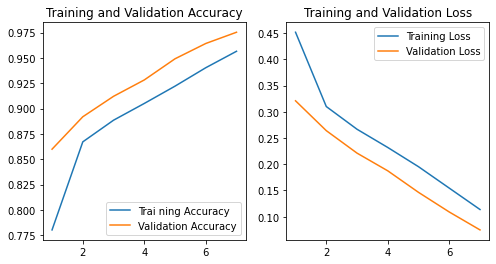

In [161]:
history_dict = history_1.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy 그래프
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Trai ning Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [162]:
# 테스트셋을 통한 모델 평가
results = model_1.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 13s - loss: 0.4071 - accuracy: 0.8641
[0.40712204575538635, 0.8641088604927063]


##### 3-2 ) 1-D CNN

In [163]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))
model_2.add(keras.layers.Conv1D(16, 7, activation='relu'))
model_2.add(keras.layers.MaxPooling1D(5))
model_2.add(keras.layers.Conv1D(16, 7, activation='relu'))
#GlobalMaxPooling1D() 레이어 : 전체 문장중, 단 하나의 단어만 피처로 추출  
#추출된 피처로 문장의 긍정/부정 평가 -> 의외로 성능 좋음
model_2.add(keras.layers.GlobalMaxPooling1D())
model_2.add(keras.layers.Dense(8, activation='relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model_2.add(keras.layers.Dense(1, activation='sigmoid')) 

model_2.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_46 (Embedding)     (None, 41, 200)           2000000   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 35, 16)            22416     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [164]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs= 5  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_2 = model_2.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping],
                    verbose=1)

Epoch 1/5
286/286 [==============================] - 9s 28ms/step - loss: 0.6214 - accuracy: 0.6223 - val_loss: 0.4043 - val_accuracy: 0.8218
Epoch 2/5
286/286 [==============================] - 8s 27ms/step - loss: 0.3880 - accuracy: 0.8274 - val_loss: 0.3195 - val_accuracy: 0.8648
Epoch 3/5
286/286 [==============================] - 8s 27ms/step - loss: 0.3248 - accuracy: 0.8614 - val_loss: 0.2793 - val_accuracy: 0.8858
Epoch 4/5
286/286 [==============================] - 8s 27ms/step - loss: 0.2851 - accuracy: 0.8821 - val_loss: 0.2525 - val_accuracy: 0.8988
Epoch 5/5
286/286 [==============================] - 8s 27ms/step - loss: 0.2613 - accuracy: 0.8935 - val_loss: 0.2319 - val_accuracy: 0.9111


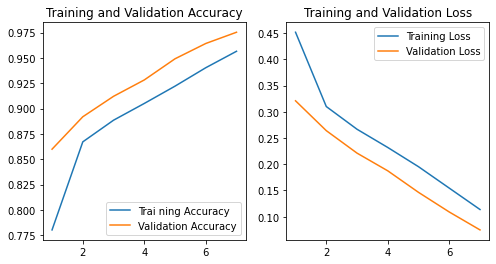

In [165]:
history_dict = history_1.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy 그래프
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Trai ning Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [166]:
# 테스트셋을 통한 모델 평가
results = model_2.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3616 - accuracy: 0.8461
[0.36163055896759033, 0.8460850119590759]


##### 3-3 ) LSTM + dropout
우수노드 참고

In [230]:
model_3 = keras.Sequential()
model_3.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model_3.add(keras.layers.Bidirectional(keras.layers.LSTM(128, recurrent_dropout=0)))   # Bidirectional layer
model_3.add(keras.layers.Dropout(0.25))
model_3.add(keras.layers.Dense(8, activation='relu'))
model_3.add(keras.layers.Dropout(0.3))
model_3.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim
model_3.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, 41, 200)           2000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 2056      
_________________________________________________________________
dropout_15 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 9         
Total params: 2,338,961
Trainable params: 2,338,961
Non-trainable params: 0
___________________________________________

In [231]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs= 5  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_3 = model_3.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping],
                    verbose=1)

Epoch 1/5
286/286 [==============================] - 24s 72ms/step - loss: 0.5605 - accuracy: 0.6913 - val_loss: 0.3369 - val_accuracy: 0.8510
Epoch 2/5
286/286 [==============================] - 20s 69ms/step - loss: 0.3494 - accuracy: 0.8558 - val_loss: 0.2771 - val_accuracy: 0.8846
Epoch 3/5
286/286 [==============================] - 20s 69ms/step - loss: 0.3077 - accuracy: 0.8764 - val_loss: 0.2482 - val_accuracy: 0.8978
Epoch 4/5
286/286 [==============================] - 20s 69ms/step - loss: 0.2783 - accuracy: 0.8906 - val_loss: 0.2314 - val_accuracy: 0.9071
Epoch 5/5
286/286 [==============================] - 20s 69ms/step - loss: 0.2575 - accuracy: 0.9006 - val_loss: 0.2065 - val_accuracy: 0.9176


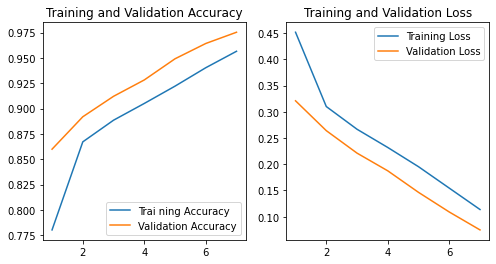

In [232]:
history_dict = history_1.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy 그래프
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Trai ning Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [233]:
# 테스트셋을 통한 모델 평가
results = model_2.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.4454 - accuracy: 0.8397
[0.4453732967376709, 0.8397176265716553]


##### 4) 각 모델 결과  
| 모델 | val_accuracy | val_loss|  
|------|------|------|
|LSTM|0.9754|0.0749|  
|1-D CNN|0.9111|0.2319|  
|LSTM-Dropout|0.8397|0.4454|

## 회고

##### 💚루브릭
1. 다양한 방법으로 Text Classification 태스크를 성공적으로 구현하였다.  
3가지 이상의 모델 = RNN(LSTM), 1-D CNN, LSTM+Dropout 시도  
<br>

2. gensim을 활용하여 자체학습된 혹은 사전학습된 임베딩 레이어를 분석하였다.  
gensim의 유사단어 찾기를 활용하여  
자체학습한 임베딩과 사전학습 임베딩을 적절히 분석함  
<br>

3. 한국어 Word2Vec을 활용하여 가시적인 성능향상을 달성했다.
네이버 영화리뷰 데이터 감성분석 정확도를 85% 이상 달성함
<br>

##### 💚어려웠던 점  
임베딩 레이어에 대한 기초지식이 부족해서  
코드를 보더라도, 이해하기 어려웠다  
그래서 개인적으로 공부해서 노드, 프로젝트를 진행해보았는데  
이해도가 높아져서 개인적으로 만족한다  

##### 💚더 개선하고 싶은 점
CNN+RNN 에 CRNN, RCNN 이 있는데,  
해당 개념들을 확실하게 이해하지 못했다  
개념 이해 + 소스코드 구현까지 해내보고 싶다  
이에 더 좋은 성능으로 attention, transfomer 에 대한 것도 공부해보고 싶다  
